In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import random
import seaborn as sns

np.random.seed(123456)

In [ ]:
def hepatitis_data():
    hep_names = ["Class", "Age", "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", "Anorexia",
                 "Liver_Big", "Liver_Firm", "Spleen_Palpable", "Spiders", "Ascites", "Varices",
                 "Bilirubin", "Alk_Phosphate", "Sgot", "Albumin", "Protime", "Histology"]
    
    hep_df = pd.read_csv('https://raw.githubusercontent.com/TanjaBarath/MiniProject1/main/hepatitis.csv', header=None, names=hep_names)  
    # print(hep_df.shape)

    # eliminating rows with ? values in the dataframe
    hep_df.drop(hep_df.index[hep_df.eq('?').any(1)], inplace=True)

    # notice the ? made some columns non-numeric
    hep_df = hep_df.apply(pd.to_numeric, errors='ignore')

    # hepatitis data has Class 1 and 2, change this to 0 and 1
    hep_df.loc[:, 'Class'] = hep_df['Class'].apply(lambda x: x-1)

    return hep_df

In [ ]:
def hep_stats(dataset):
    # first 5 rows of the data and description
    print(dataset.head().to_string(), "\n")
    print(dataset.describe(include='all').to_string())

    # useful statistics
    # total number of rows after dropping
    num_rows = dataset.shape[0]
    print("\nNumber of rows/data points in the dataset after dropping: ", num_rows)

    # number of people that have died and lived
    group = dataset.groupby('Class')
    #print(group.size())
    print("The number of people in the dataset that have died: ", group.size()[0])
    print("The number of people in the dataset that have lived: ", group.size()[1], "\n")

    # distribution of Age versus Class
    dataset.boxplot(column='Age', by='Class')
    plt.title('Distribution of Age for every Class')
    plt.suptitle('')
    plt.ylabel('Age')
    plt.xlabel('')
    plt.xticks(np.arange(4), ['', 'Die', 'Live', ''])
    plt.show()

    # Male and Female counts for each Class
    sex_dist = dataset.groupby(['Class', 'Sex']).size().unstack(fill_value=0).stack().reset_index(name='count')
    x = np.arange(2)
    width = 0.2
    plt.bar(x-0.1, sex_dist.loc[sex_dist['Sex']==1]['count'].to_numpy(), width, color='cyan')
    plt.bar(x+0.1, sex_dist.loc[sex_dist['Sex']==2]['count'].to_numpy(), width, color='green')
    plt.title('Count of Sex for each Class')
    plt.xticks(x, ['Die', 'Live'])
    plt.legend(['Male', 'Female'])
    plt.show()

    # count of yes/no features based on class
    Steroid = dataset.groupby(['Class', 'Steroid']).size().reset_index(name='count')
    Antivirals = dataset.groupby(['Class', 'Antivirals']).size().reset_index(name='count')
    Fatigue = dataset.groupby(['Class', 'Fatigue']).size().reset_index(name='count')
    Malaise = dataset.groupby(['Class', 'Malaise']).size().reset_index(name='count')
    Anorexia = dataset.groupby(['Class', 'Anorexia']).size().unstack(fill_value=0).stack().reset_index(name='count')
    LiverBig = dataset.groupby(['Class', 'Liver_Big']).size().unstack(fill_value=0).stack().reset_index(name='count')
    LiverFirm = dataset.groupby(['Class', 'Liver_Firm']).size().reset_index(name='count')
    SpleenPalpable = dataset.groupby(['Class', 'Spleen_Palpable']).size().reset_index(name='count')
    Spiders = dataset.groupby(['Class', 'Spiders']).size().reset_index(name='count')
    Ascites = dataset.groupby(['Class', 'Ascites']).size().reset_index(name='count')
    Varices = dataset.groupby(['Class', 'Varices']).size().reset_index(name='count')
    Histology = dataset.groupby(['Class', 'Histology']).size().reset_index(name='count')

    # add all the above into a table with Class, Answer and Feature Counts
    count_dist = pd.DataFrame({'Class': [0, 0, 1, 1], 'Answer': [1, 2, 1, 2], 'Steroid': Steroid['count'],
                               'Antivirals': Antivirals['count'], 'Fatigue': Fatigue['count'], 'Malaise': Malaise['count'],
                               'Anorexia': Anorexia['count'], 'Liver_Big': LiverBig['count'], 'Liver_Firm': LiverFirm['count'],
                               'Spleen_Palpable': SpleenPalpable['count'], 'Spiders': Spiders['count'], 'Ascites': Ascites['count'],
                               'Varices': Varices['count'], 'Histology': Histology['count']})

    # making two plots for yes/no features, first one only has people who died (Class == 0)
    x = np.arange(12)
    width = 0.2
    plt.bar(x-0.1, count_dist.loc[(count_dist['Class'] == 0) & (count_dist['Answer'] == 1)].to_numpy().flatten()[2:],
            width, color='cyan')
    plt.bar(x+0.1, count_dist.loc[(count_dist['Class'] == 0) & (count_dist['Answer'] == 2)].to_numpy().flatten()[2:],
            width, color='green')
    plt.title('Count of Yes/No Answer for Different Features in Class Die')
    plt.xticks(x, ['Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big', 'Liver_Firm',
                               'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology'], rotation=90)
    plt.ylabel('Count')
    plt.legend(['No', 'Yes'])
    plt.show()

    # second graph has people ho have lived (Class == 1)
    plt.bar(x-0.1, count_dist.loc[(count_dist['Class'] == 1) & (count_dist['Answer'] == 1)].to_numpy().flatten()[2:],
            width, color='cyan')
    plt.bar(x+0.1, count_dist.loc[(count_dist['Class'] == 1) & (count_dist['Answer'] == 2)].to_numpy().flatten()[2:],
            width, color='green')
    plt.title('Count of Yes/No Answer for Different Features in Class Live')
    plt.xticks(x, ['Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big', 'Liver_Firm',
                   'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology'], rotation=90)
    plt.ylabel('Count')
    plt.legend(['No', 'Yes'])
    plt.show()

    # boxplots of the rest of the features vs Class
    # Bilirubin
    dataset.boxplot(column='Bilirubin', by='Class')
    plt.title('Distribution of Bilirubin for every Class')
    plt.suptitle('')
    plt.ylabel('Bilirubin')
    plt.xlabel('')
    plt.xticks(np.arange(4), ['', 'Die', 'Live', ''])
    plt.show()

    # Alk Phosphate
    dataset.boxplot(column='Alk_Phosphate', by='Class')
    plt.title('Distribution of Alk Phosphate for every Class')
    plt.suptitle('')
    plt.ylabel('Alk Phosphate')
    plt.xlabel('')
    plt.xticks(np.arange(4), ['', 'Die', 'Live', ''])
    plt.show()

    # Sgot
    dataset.boxplot(column='Sgot', by='Class')
    plt.title('Distribution of Sgot for every Class')
    plt.suptitle('')
    plt.ylabel('Sgot')
    plt.xlabel('')
    plt.xticks(np.arange(4), ['', 'Die', 'Live', ''])
    plt.show()

    # Albumin
    dataset.boxplot(column='Albumin', by='Class')
    plt.title('Distribution of Albumin for every Class')
    plt.suptitle('')
    plt.ylabel('Albumin')
    plt.xlabel('')
    plt.xticks(np.arange(4), ['', 'Die', 'Live', ''])
    plt.show()

    # Protime
    dataset.boxplot(column='Protime', by='Class')
    plt.title('Distribution of Protime for every Class')
    plt.suptitle('')
    plt.ylabel('Protime')
    plt.xlabel('')
    plt.xticks(np.arange(4), ['', 'Die', 'Live', ''])
    plt.show()

    print(dataset[dataset.columns].corr()['Class'][:].sort_values())

    Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver_Big  Liver_Firm  Spleen_Palpable  Spiders  Ascites  Varices  Bilirubin  Alk_Phosphate  Sgot  Albumin  Protime  Histology
5       1   34    1        2           2        2        2         2          2           2                2        2        2        2        0.9             95    28      4.0       75          1
10      1   39    1        1           1        2        2         2          1           1                2        2        2        2        1.3             78    30      4.4       85          1
11      1   32    1        2           1        1        2         2          2           1                2        1        2        2        1.0             59   249      3.7       54          1
12      1   41    1        2           1        1        2         2          2           1                2        2        2        2        0.9             81    60      3.9       52          1
13      1   30 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


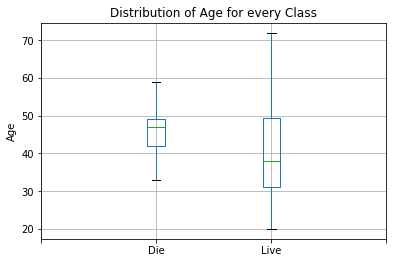

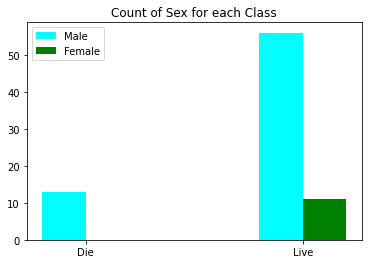

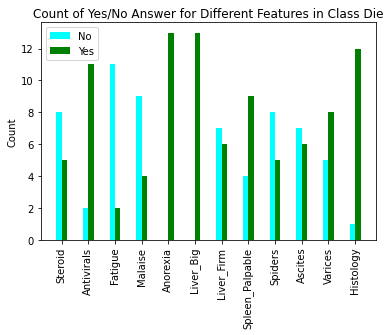

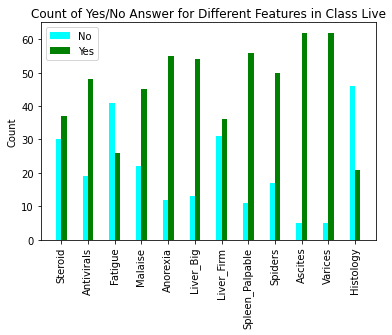

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


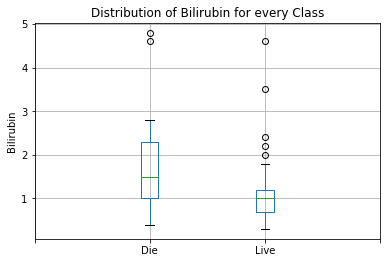

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


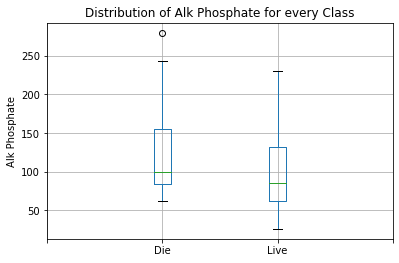

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


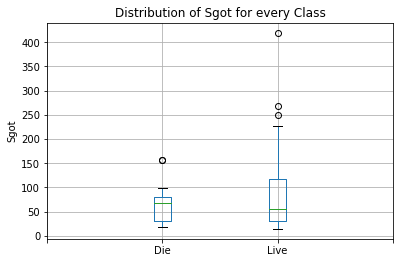

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


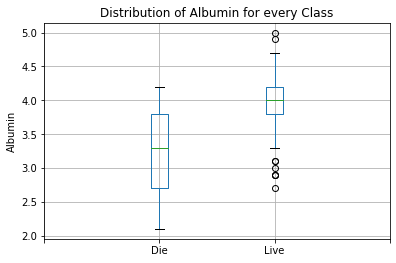

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


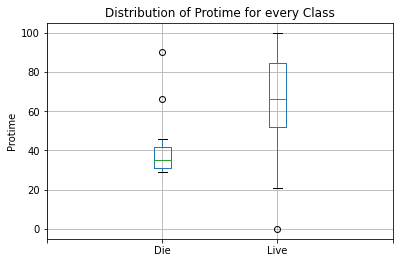

Histology         -0.456856
Bilirubin         -0.351557
Age               -0.212769
Liver_Big         -0.194030
Alk_Phosphate     -0.189360
Anorexia          -0.185042
Antivirals        -0.108776
Liver_Firm         0.055978
Sgot               0.078731
Steroid            0.123830
Spleen_Palpable    0.135643
Sex                0.175876
Fatigue            0.181151
Malaise            0.275595
Spiders            0.287839
Varices            0.345785
Protime            0.395386
Albumin            0.477404
Ascites            0.479211
Class              1.000000
Name: Class, dtype: float64


In [ ]:
hep_df = hepatitis_data()
#to look at graphs
hep_stats(hep_df)

In [ ]:
def messidor_data():
    # Not sure about the columns names? The descriptions were not helpful
    # Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.
    
    messidor_names = ["Quality", "Pre-Screening-severe retinal abnormality", "MA_Detection_0.5", "MA_Detection_0.6", "MA_Detection_0.7",
                 "MA_Detection_0.8", "MA_Detection_0.9", "MA_Detection_1.0", "Exudates_0.5",
                 "Exudates_0.6", "Exudates_0.7", "Exudates_0.8", "Exudates_0.9", "Exudates_0.95",
                 "Exudates_0.99", "Exudates_1.0", "Distance", "Diameter", "AM/FM_Classification", "Class"]

    messidor_df = pd.read_csv('https://raw.githubusercontent.com/TanjaBarath/MiniProject1/main/messidor_features.csv', header=None, names=messidor_names)

    #print(messidor_df)
    num_rows = messidor_df.shape[0]
    print("\n Number of rows/data points in the dataset: ", num_rows)

    # the messidor dataset does not have any missing values
    # the dataset does have a feature representing the quality of the image
    # delete 4 rows with bad quality, i.e. Quality==0
    
    messidor_df = messidor_df.drop(messidor_df[messidor_df['Quality'] == 0].index)
    num_rows = messidor_df.shape[0]
    print("\n Number of rows/data points in the dataset after dropping: ", num_rows)

    # might need more cleaning up based on data values

    return messidor_df

In [ ]:
def messidor_stats(dataset):
    # first 5 rows of the data and description
    print(dataset.head().to_string(), "\n")
    data = dataset.groupby('Class')
    print(data.describe(include='all').to_string())

    # get correlation matrix
    print(dataset[dataset.columns].corr()['Class'][:].sort_values())

    # seems like all features are not very correlated with Class
    # but here are boxplots for the most correlated features
    # MA Detection 0.5, MA Detection 0.6, MA Detection 0.7, MA Detection 0.8, Exudates 0.99
    df = pd.DataFrame(data = dataset[['Class', 'MA_Detection_0.5', 'MA_Detection_0.6', 'MA_Detection_0.7', 'MA_Detection_0.8', 'Exudates_0.99']],
                      columns = ['Class', 'MA_Detection_0.5', 'MA_Detection_0.6', 'MA_Detection_0.7', 'MA_Detection_0.8', 'Exudates_0.99'])
    df.loc[:, 'Exudates_0.99'] = df['Exudates_0.99'].apply(lambda x: x * 10)
    df = pd.melt(df, id_vars=['Class'], value_vars = ['MA_Detection_0.5', 'MA_Detection_0.6', 'MA_Detection_0.7', 'MA_Detection_0.8', 'Exudates_0.99'], var_name = 'Feature', value_name = 'Value')
    sns.set_theme(style="ticks", palette="pastel")
    plot = sns.boxplot(x='Feature', y='Value', hue='Class', palette=["m","g"], data = df)
    plt.xticks(rotation=45)
    plt.suptitle('')
    plot.legend(title = 'Class')
    legend_labels = ['No DR', 'DR']
    n = 0
    for i in legend_labels:
        plot.legend_.texts[n].set_text(i)
        n += 1
    plt.tight_layout()
    plt.show()


 Number of rows/data points in the dataset:  1151

 Number of rows/data points in the dataset after dropping:  1147
   Quality  Pre-Screening-severe retinal abnormality  MA_Detection_0.5  MA_Detection_0.6  MA_Detection_0.7  MA_Detection_0.8  MA_Detection_0.9  MA_Detection_1.0  Exudates_0.5  Exudates_0.6  Exudates_0.7  Exudates_0.8  Exudates_0.9  Exudates_0.95  Exudates_0.99  Exudates_1.0  Distance  Diameter  AM/FM_Classification  Class
0        1                                         1                22                22                22                19                18                14     49.895756     17.775994      5.270920      0.771761      0.018632       0.006864       0.003923      0.003923  0.486903  0.100025                     1      0
1        1                                         1                24                24                22                18                16                13     57.709936     23.799994      3.325423      0.234185      0.003903     

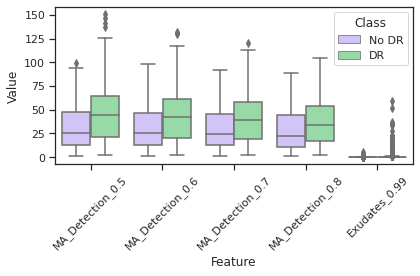

In [ ]:
messidor_df = messidor_data()
messidor_stats(messidor_df)

In [ ]:
# real-valued feature vectors
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
chebyshev = lambda x1, x2: np.max(np.abs(x1 - x2))
minkowski = lambda x1, x2, p: np.sum(np.abs(x1 - x2)**p, axis=-1)**(1/p)
cosine = lambda x1, x2: (np.transpose(x1) * x2)/(np.linalg.norm(x1) * np.linalg.norm(x2))
# discrete feature vectors
hamming = lambda x1, x2: np.count_nonzero(x1 != x2)

In [ ]:
class KNN:
    def __init__(self, K, dist_fn=euclidean):
        self.K = K
        self.dist_fn = dist_fn

    def fit(self, x, y):
        # only need training set since KNN is a lazy learner
        self.x = x
        self.y = y
        # each dataset has a 2-valued class
        self.C = y['Class'].max()+1

    # predict the Class of some test data
    def predict(self, x_test):
        # how many test data points are we predicting
        num_test = x_test.shape[0]
        # get the distance between our trained data and test data
        # go through every test point and calculate distance with every training point
        distances = []
        for k in range(x_test.shape[0]):
            temp_dist = []
            for i in range(self.x.shape[0]):
                dist = self.dist_fn(x_test.iloc[k,0], self.x.iloc[i,0])
                temp_dist.append(dist)
            distances.append(temp_dist)
        # ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        # ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        # sort the neighbors to get the K nearest and get the prob of each class based on neighbours
        for i in range(num_test):
            knns[i, :] = np.argsort(distances[i])[:self.K]
            y_prob[i, :] = np.bincount(self.y.iloc[knns[i, :]]['Class'].to_numpy(), minlength=self.C)
        # divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

    # model accuracy
    def evaluate_acc(self, y_pred, y_test):
        # accuracy equation
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        return accuracy

In [ ]:
# predicting Class (Live or Die) based on important features using cross validation
def KNN_cross_validation(dataset, train, features, K, L_fold):
    # split the class from the features
    x_train, y_train = train[features], train[['Class']]

    # implementing L-fold cross-validation on train data
    acc = []
    # splitting the training dataset into L chunks
    fold_size = int(train.shape[0]/L_fold)
    x_fold, y_fold = [], []
    for i in range(0, dataset.shape[0], fold_size):
        x_fold.append(x_train[i:(i+fold_size)])
        y_fold.append(y_train[i:(i+fold_size)])
    # the folds are created, iterate through and change validation set
    for i in range(L_fold):
        # need to concat the L-1 training chunks for x (feature values) and y (class)
        x_chunk, y_chunk = [], []
        x_chunk.append(x_fold[:i] + x_fold[(i+1):])
        y_chunk.append(y_fold[:i] + y_fold[(i+1):])

        # training and validation sets concatenated into dataframes
        train_x, train_y = pd.concat(x_chunk[0]), pd.concat(y_chunk[0])
        validation_x, validation_y = x_fold[i], y_fold[i]

        # fitting the model
        model = KNN(K=K)
        model.fit(train_x, train_y)
        validation_prob, validation_knns = model.predict(validation_x)

        # choose class that has the max probability
        validation_pred = np.argmax(validation_prob, axis=-1)
        # y_test is a dataframe, convert it to a numpy array and calculate accuracy
        accuracy = model.evaluate_acc(validation_pred, validation_y['Class'].to_numpy())
        acc.append(accuracy)

    mean = round(np.mean(acc),5)
    var = round(np.var(acc),5)

    #print("\nKNN for K = ", K, " on given dataset")
    #print("Accuracies from cross validation: ", acc)
    #print("Mean of accuracies: ", mean)
    #print("Variance of accuracies: ", var)

    return mean, var

instances (N) 	  80 
 features (D) 	  2   ['Albumin', 'Protime'] 
 classes (C) 	  2


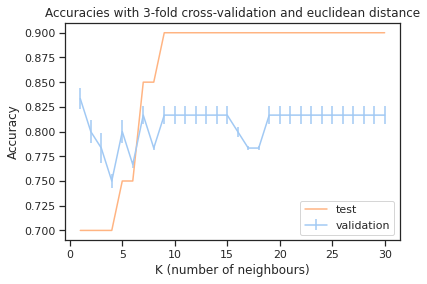

KNN with K=12 accuracy on test set:  0.9


In [ ]:
np.random.seed(123456)

# hyper-parameter tuning
data = hepatitis_data() # change this to hepatitis or messidor dataset
# randomize the data
data = data.sample(frac=1)
# change the features used
features = ['Albumin', 'Protime']
# info on training and test set
x, y = data[features], data[['Class']]
(N, D), C = x.shape, y['Class'].max()+1 
print("instances (N) \t ", N, "\n features (D) \t ", D, " ", features, "\n classes (C) \t ", C) 
# split the data into train and test
train, test = data[:60], data[60:]
L = 3 # change the number of splits (L-fold)
means, variances, test_acc, K_list = [], [], [], []
for K in range(1, 31, 1): # change the K values 
  K_list.append(K)
  mean, var = KNN_cross_validation(data, train, features, K, L)
  means.append(mean)
  variances.append(var) 

  # get accuracy on test set
  model = KNN(K=K)
  model.fit(train[features], train[['Class']])
  prob, knns = model.predict(test[features])

  # choose class that has the max probability
  predictions = np.argmax(prob, axis=-1)
  accuracy = model.evaluate_acc(predictions, test['Class'].to_numpy())
  test_acc.append(accuracy)

plt.errorbar(K_list, means, variances, label='validation')
plt.plot(K_list, test_acc, label='test')
plt.legend()
plt.title('Accuracies with 3-fold cross-validation and euclidean distance')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Accuracy')
plt.show()

# get accuracy on test set with optimal K=12
opt_model = KNN(K=12)
opt_model.fit(train[features], train[['Class']])
opt_prob, opt_knns = opt_model.predict(test[features])

# choose class that has the max probability
opt_predictions = np.argmax(opt_prob, axis=-1)
accuracy_opt = model.evaluate_acc(opt_predictions, test['Class'].to_numpy())

print('KNN with K=12 accuracy on test set: ', accuracy_opt)

# many other tests were done by changing the different parameters above 
# and changing the datasets

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the depth of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.num_classes = num_classes  # number of classes in the tree
        self.max_depth = max_depth      # maximum dept for termination 
        self.root = None                # stores the root of the decision tree 
        self.cost_fn = cost_fn          # stores the cost function of the decision tree 
          # stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  # minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            # pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

    def evaluate_acc(self, y_pred, y_test):
        pass
    
    def get_params(self, deep = False):
        return {'num_classes': self.num_classes, 'max_depth': self.max_depth, 'cost_fn': self.cost_fn, 'min_leaf_instances': self.min_leaf_instances}

In [ ]:
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

In [ ]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

In [ ]:
def evaluate_acc(self, y_pred, y_test):
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  return accuracy

DecisionTree.evaluate_acc = evaluate_acc

In [ ]:
# To find best parameters 
fit_parameters = {'max_depth': [1, 3, 5,10, 15, 20, 30], 'cost_fn':[cost_misclassification, cost_entropy, cost_gini_index], 'min_leaf_instances': [1, 10, 20, 50]}

# To see impact of max_depth changes
# fit_parameters = {'max_depth': [1, 3, 5,10, 15, 20, 30]}

# To see impact of cost function changes
# fit_parameters = {'cost_fn':[cost_misclassification, cost_entropy, cost_gini_index]}

# To see impact of min_leaf_instances changes
# fit_parameters = {'min_leaf_instances': [1, 10, 20, 50]}

In [ ]:
params = sorted(fit_parameters)
combinations = [dict(zip(params, prod)) for prod in it.product(*(fit_parameters[varName] for varName in params))]

# print(len(combinations))

In [ ]:
np.random.seed(123456)

def DT_hyperparameter_tuning(dataset, train, features,L_fold):
    # split the class from the features
    x_train, y_train = train[features], train[['Class']]
    best_accuracy = 0.
    best_parameters = ""
    
    for combination in range(len(combinations)):
      print(combinations[combination])
      # implementing L-fold cross-validation on train data
      acc = []
      # splitting the training dataset into L chunks
      fold_size = int(train.shape[0]/L_fold)
      x_fold, y_fold = [], []
      
      for i in range(0, dataset.shape[0], fold_size):
          x_fold.append(x_train[i:(i+fold_size)])
          y_fold.append(y_train[i:(i+fold_size)])
      # the folds are created, iterate through and change validation set

      for i in range(L_fold):
          # need to concat the L-1 training chunks for x (feature values) and y (class)
          x_chunk, y_chunk = [], []
          x_chunk.append(x_fold[:i] + x_fold[(i+1):])
          y_chunk.append(y_fold[:i] + y_fold[(i+1):])

          # training and validation sets concatenated into dataframes
          train_x, train_y = pd.concat(x_chunk[0]), pd.concat(y_chunk[0])
          validation_x, validation_y = x_fold[i], y_fold[i]

          # fitting the model
          tree = DecisionTree(max_depth=combinations[combination]['max_depth'], cost_fn=combinations[combination]['cost_fn'], min_leaf_instances=combinations[combination]['min_leaf_instances'])
          # tree = DecisionTree(max_depth=combinations[combination]['max_depth'])
          # tree = DecisionTree(cost_fn=combinations[combination]['cost_fn'])
          tree = DecisionTree( min_leaf_instances=combinations[combination]['min_leaf_instances'])
          probs_test = tree.fit(x_train.to_numpy(), y_train.values.flatten()).predict(validation_x.to_numpy())
          y_pred = np.argmax(probs_test,1)
          accuracy = tree.evaluate_acc(y_pred, validation_y.values.flatten())
          acc.append(accuracy)

      mean_accuracy = np.mean(acc)
      variance_accuracy = np.var(acc)
      print("Mean of accuracies: ", round(np.mean(acc), 2))
      # print("Variance of accuracies: ", round(np.var(acc), 2))

      if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy 
        best_parameters = combinations[combination]
      
    print("Best accuracy: ", round(best_accuracy, 2))
    print("Best parameters: ", best_parameters)
    
    return best_parameters, best_accuracy




 Number of rows/data points in the dataset:  1151

 Number of rows/data points in the dataset after dropping:  1147
Class              1.000000
Ascites            0.479211
Albumin            0.477404
Protime            0.395386
Varices            0.345785
Spiders            0.287839
Malaise            0.275595
Fatigue            0.181151
Sex                0.175876
Spleen_Palpable    0.135643
Steroid            0.123830
Sgot               0.078731
Liver_Firm         0.055978
Antivirals        -0.108776
Anorexia          -0.185042
Alk_Phosphate     -0.189360
Liver_Big         -0.194030
Age               -0.212769
Bilirubin         -0.351557
Histology         -0.456856
Name: Class, dtype: float64
Class                                       1.000000
MA_Detection_0.5                            0.291177
MA_Detection_0.6                            0.264829
MA_Detection_0.7                            0.233237
MA_Detection_0.8                            0.195784
Exudates_0.99                 

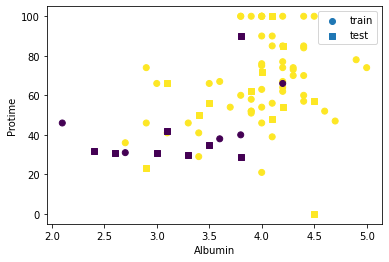

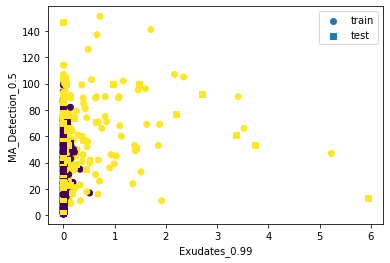

In [ ]:
hep_df = hepatitis_data()
messidor_df = messidor_data()

# Hepatitis Data
f1, f2 = 'Albumin', 'Protime' # change features to see the layout
x1, y1 = hep_df[[f1, f2]], hep_df['Class'] 
x1_train, y1_train = x1.iloc[:60], y1.iloc[:60]
x1_test, y1_test = x1.iloc[60:], y1.iloc[60:]
# Messidor Data
f3, f4 = 'MA_Detection_0.8', 'MA_Detection_0.5' # change features to see the layout
x2, y2 = messidor_df[[f3, f4]], messidor_df['Class'] 
x2_train, y2_train = x2.iloc[:1000], y2.iloc[:1000]
x2_test, y2_test = x2.iloc[1000:], y2.iloc[1000:]
#Visualization of the data
plt.scatter(x1_train.iloc[:,0] , x1_train.iloc[:,1], c=y1_train, marker='o', label='train')
plt.scatter(x1_test.iloc[:,0], x1_test.iloc[:,1], c=y1_test, marker='s', label='test')
plt.legend()
plt.xlabel(f1)
plt.ylabel(f2)
plt.show()

plt.scatter(x2_train.iloc[:,0] , x2_train.iloc[:,1], c=y2_train, marker='o', label='train')
plt.scatter(x2_test.iloc[:,0], x2_test.iloc[:,1], c=y2_test, marker='s', label='test')
plt.legend()
plt.xlabel(f3)
plt.ylabel(f4)
plt.show()

In [ ]:
# Decision Boundary for two most highly correlated features
# Hepatitis Data -KNN
np.random.seed(123456)
data = hep_df.sample(frac=1)
features = ['Albumin', 'Protime']
x, y = data[features], data[['Class']]
(N, D), C = x.shape, y['Class'].max()+1

#split the dataset into train and test
x_train, y_train = x[:60], y[:60]
x_test, y_test = x[60:], y[60:]

x0v = np.linspace(np.min(x.iloc[:,0]), np.max(x.iloc[:,0]), 200)
x1v = np.linspace(np.min(x.iloc[:,1]), np.max(x.iloc[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
x_all = pd.DataFrame(x_all)


model = KNN(K=12)
model.fit(x_train, y_train)

y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

#to get class probability of all the points in the 2D grid
y_prob_all, _ = model.predict(x_all)

y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
z = np.zeros((40000,1))
y_pred_all = np.append(y_pred_all, z, axis=1)

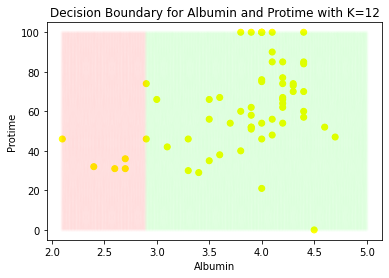

In [ ]:
plt.scatter(x_train[features[0]], x_train[features[1]], c=y_train_prob, marker='o', alpha=1)  
plt.scatter(x_all.iloc[:,0], x_all.iloc[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.title('Decision Boundary for Albumin and Protime with K=12')
plt.xlabel('Albumin')
plt.ylabel('Protime')
plt.show()

In [ ]:
# Messidor Data - KNN
np.random.seed(123456)
data = messidor_df.sample(frac=1)
features = ['MA_Detection_0.8', 'MA_Detection_0.5']
x, y = data[features], data[['Class']]
(N, D), C = x.shape, y['Class'].max()+1 
train, test = data[:1000], data[1000:]

x0v = np.linspace(np.min(train[features[0]]), np.max(train[features[0]]), 200)
x1v = np.linspace(np.min(train[features[1]]), np.max(train[features[1]]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
x_all = pd.DataFrame(x_all)

model = KNN(K=40)
model.fit(train[features], train[['Class']])
#y_prob, knns = model.predict(test[features])
#y_pred = np.argmax(y_prob, axis=-1)
y_train_prob = np.zeros((train[['Class']].shape[0], C+1))
y_train_prob[np.arange(train[['Class']].shape[0]), train[['Class']]] = 1

#to get class probability of all the points in the 2D grid
y_prob_all, _ = model.predict(x_all)
y_prob_all_draw = np.zeros((y_prob_all.shape[0], C+1))

for i in range(y_prob_all.shape[0]) :
  y_prob_all_draw [i,0:2] = y_prob_all[i,0:2]


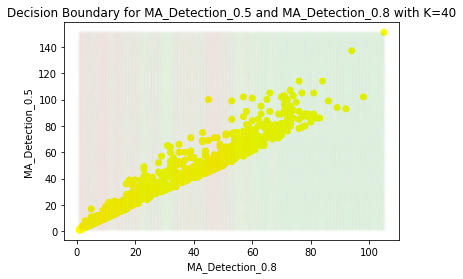

In [ ]:
plt.scatter(train[features[0]], train[features[1]], c=y_train_prob, marker='o', alpha=1)  
plt.scatter(x_all.iloc[:,0], x_all.iloc[:,1], c=y_prob_all_draw, marker='.', alpha=0.01)
plt.title('Decision Boundary for MA_Detection_0.5 and MA_Detection_0.8 with K=40')
plt.xlabel('MA_Detection_0.8')
plt.ylabel('MA_Detection_0.5')
plt.show()

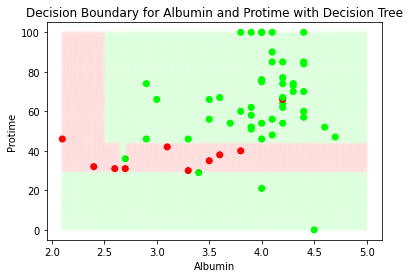

In [ ]:
# Hepatitis Data -Decision Tree
np.random.seed(123456)
data = hep_df.sample(frac=1)
features = ['Albumin', 'Protime']
x, y = data[features], data[['Class']]
(N, D), C = x.shape, y['Class'].max()+1

inds = np.random.permutation(N)  
x_train, y_train = x.iloc[inds[:60]].to_numpy(), y.iloc[inds[:60]].values.flatten()
x_test, y_test = x.iloc[inds[60:]].to_numpy(), y.iloc[inds[60:]].values.flatten()

x0v = np.linspace(np.min(x.iloc[:,0]), np.max(x.iloc[:,0]), 200)
x1v = np.linspace(np.min(x.iloc[:,1]), np.max(x.iloc[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
#x_all = pd.DataFrame(x_all)

model = DecisionTree(max_depth=200)
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train_prob.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)
y_prob_all_draw = np.zeros((y_prob_all.shape[0], C+1))

for i in range(y_prob_all.shape[0]) :
  y_prob_all_draw [i,0:2] = y_prob_all[i,0:2]


# to plot
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)  
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_draw, marker='.', alpha=0.01)
plt.title('Decision Boundary for Albumin and Protime with Decision Tree')
plt.xlabel('Albumin')
plt.ylabel('Protime')
plt.show()

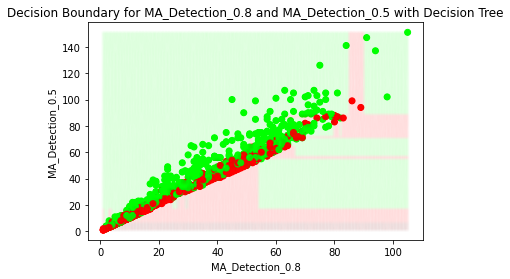

In [ ]:
# Messidor Data -Decision Tree
np.random.seed(123456)
data = messidor_df.sample(frac=1)
features = ['MA_Detection_0.8', 'MA_Detection_0.5']
x, y = data[features], data[['Class']]
(N, D), C = x.shape, y['Class'].max()+1

inds = np.random.permutation(N)  
x_train, y_train = x.iloc[inds[:1000]].to_numpy(), y.iloc[inds[:1000]].values.flatten()
x_test, y_test = x.iloc[inds[1000:]].to_numpy(), y.iloc[inds[1000:]].values.flatten()

x0v = np.linspace(np.min(x.iloc[:,0]), np.max(x.iloc[:,0]), 200)
x1v = np.linspace(np.min(x.iloc[:,1]), np.max(x.iloc[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
#x_all = pd.DataFrame(x_all)

model = DecisionTree(max_depth=30)
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train_prob.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)
y_prob_all_draw = np.zeros((y_prob_all.shape[0], C+1))

for i in range(y_prob_all.shape[0]) :
  y_prob_all_draw [i,0:2] = y_prob_all[i,0:2]


# to plot
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)  
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_draw, marker='.', alpha=0.01)
plt.title('Decision Boundary for MA_Detection_0.8 and MA_Detection_0.5 with Decision Tree')
plt.xlabel('MA_Detection_0.8')
plt.ylabel('MA_Detection_0.5')
plt.show()